Chapter 14

# 随机变量向量投影
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

此代码使用鸢尾花数据集的萼片长度和宽度特征，通过投影和马氏距离的度量来研究数据的分布和标准正态概率密度函数的投影。

### 数据准备和马氏距离网格
首先，代码从 `seaborn` 库中加载鸢尾花数据集，并选择其中两个特征（萼片长度 $x_1$ 和宽度 $x_2$）来分析。这些特征用于构建二维马氏距离网格，以显示数据在均值的标准差范围内的分布。这里马氏距离度量公式为：

$$ d_M(\mathbf{z}) = \sqrt{(\mathbf{z} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{z} - \mathbf{\mu})} $$

### 投影和旋转
定义投影方向 $\theta$ （单位向量 $v_1$）作为主要分析方向，使得特征投影更符合数据的方差最大方向。投影方向确定后，利用 $v_1$ 构造矩阵 $T_1$ 以进行向量的投影。计算投影后的均值 $\mu_1$ 和标准差 $\sigma_1$。利用以下公式计算一维正态分布的概率密度函数（PDF）：

$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

生成的 PDF 数组使用旋转矩阵 $R$ 投影回二维坐标系以显示在数据散点图上。

### 可视化
代码展示了以下几个要素：
1. **数据点**：使用 `scatterplot` 显示每个数据点的位置。
2. **投影结果**：投影后的数据点和投影路径显示了每个点如何映射到投影方向。
3. **马氏距离轮廓**：轮廓显示了与数据均值等距离的点，其中使用马氏距离标准差的轮廓线 $d_M = 1, 2, 3$。
4. **概率密度函数**：绘制了数据沿投影方向的一维 PDF 曲线，以显示数据分布。

通过这些步骤，此代码展示了如何使用二维马氏距离和投影方法在二维空间中研究数据的方向性分布。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
import pandas as pd  # 导入数据处理库pandas
import seaborn as sns  # 导入绘图库seaborn
from sklearn.datasets import load_iris  # 导入鸢尾花数据集
from sklearn.covariance import EmpiricalCovariance  # 导入协方差估计方法
from numpy import linalg as LA  # 导入线性代数库

## 加载鸢尾花数据集

In [2]:
iris_sns = sns.load_dataset("iris")  # 加载seaborn提供的鸢尾花数据集

## 定义一维正态分布概率密度函数

In [3]:
def normal_pdf_1d(x, mu, sigma):
    # 计算正态分布概率密度函数
    scaling = 1 / sigma / np.sqrt(2 * np.pi)  # 计算缩放系数
    z = (x - mu) / sigma  # 计算标准化变量
    pdf = scaling * np.exp(-z**2 / 2)  # 计算概率密度
    return pdf  # 返回概率密度

## 绘制向量的函数

In [4]:
def draw_vector(vector, RBG):  
    # 绘制向量的函数
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)  # 定义向量的起点和终点
    X, Y, U, V = zip(*array)  # 解压向量
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=RBG)  # 绘制向量

## 数据准备

In [5]:
X = iris_sns.to_numpy()  # 将数据集转换为numpy数组
X = np.array(X[:, :4])  # 提取前4列特征数据
x1 = X[:, :2]  # 提取前两列特征
x1 = np.array(x1, dtype=float)  # 将特征数据转换为浮点数格式

## 马氏距离网格计算

In [6]:
xx_maha, yy_maha = np.meshgrid(  # 创建网格用于马氏距离计算
    np.linspace(0, 10, 400), np.linspace(0, 10, 400))  
zz_maha = np.c_[xx_maha.ravel(), yy_maha.ravel()]  # 将网格数据整合为坐标对

emp_cov_Xc = EmpiricalCovariance().fit(x1)  # 计算经验协方差
mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)  # 计算马氏平方距离

mahal_sq_Xc = mahal_sq_Xc.reshape(xx_maha.shape)  # 将距离数据重塑为网格形状
mahal_d_Xc = np.sqrt(mahal_sq_Xc)  # 计算马氏距离

## 数据投影和可视化

In [7]:
theta = -5  # 设置投影角度
print('====================')
print('theta = ' + str(theta))
theta = theta * np.pi / 180  # 将角度转换为弧度

v1 = np.array([[np.cos(theta)], [np.sin(theta)]])  # 定义投影向量

T1 = v1 @ v1.T  # 投影矩阵

z1_2D = x1 @ T1  # 将数据投影到二维

z1_1D = x1 @ v1  # 将数据投影到一维

theta = -5


## 计算投影数据的均值和标准差

In [8]:
mu1 = z1_1D.mean()  # 计算均值
std1 = z1_1D.std(ddof=1)  # 计算标准差
var1 = z1_1D.var(ddof=1)  # 计算方差

print('mu1 = ' + str(mu1))
print('std1 = ' + str(std1))
print('var1 = ' + str(var1))

x1_array = np.linspace(mu1 - 4 * std1, mu1 + 4 * std1, 100)  # 生成x轴数据范围

R1 = np.array([[np.cos(theta), np.sin(theta)],  # 构建旋转矩阵
               [-np.sin(theta), np.cos(theta)]])

pdf1_array = normal_pdf_1d(x1_array, mu1, std1)  # 计算一维正态分布概率密度
PDF1 = np.column_stack((x1_array, pdf1_array))  # 组合PDF数据

PDF1_v1 = PDF1 @ R1  # 投影PDF到二维

mu1 = 5.554633528355593
std1 = 0.8302388779001714
var1 = 0.6892965943769356


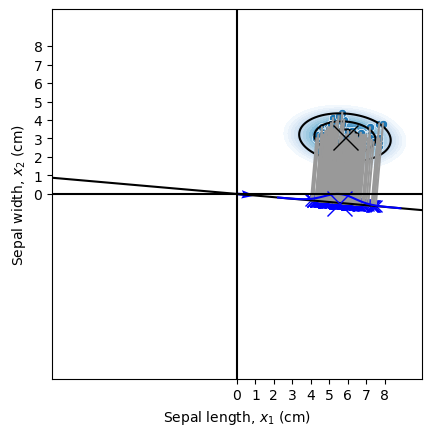

In [9]:
fig, ax = plt.subplots()  # 创建绘图窗口

plt.contourf(xx_maha, yy_maha, mahal_d_Xc, cmap='Blues_r', levels=np.linspace(0, 4, 21))  # 绘制马氏距离等高填充图
plt.contour(xx_maha, yy_maha, mahal_d_Xc, colors='k', levels=[1, 2, 3])  # 绘制马氏距离等高线

# 绘制鸢尾花数据散点图
ax = sns.scatterplot(x=x1[:, 0], y=x1[:, 1])  # 绘制x1数据的散点图

# 投影线
plt.plot(z1_2D[:, 0], z1_2D[:, 1], marker='x', markersize=8, color='b')  # 绘制二维投影数据
plt.plot(([i for (i, j) in z1_2D], [i for (i, j) in x1]),
         ([j for (i, j) in z1_2D], [j for (i, j) in x1]), c=[0.6, 0.6, 0.6])  # 绘制投影连线

plt.plot((-10, 10), (-10 * np.tan(theta), 10 * np.tan(theta)), c='k')  # 绘制投影线

# 绘制投影PDF曲线
plt.plot(PDF1_v1[:, 0], PDF1_v1[:, 1], color='b')  # 绘制PDF曲线

# 绘制数据中心和投影中心
plt.plot(x1[:, 0].mean(), x1[:, 1].mean(), marker='x', color='k', markersize=18)  # 绘制数据中心点
plt.plot(z1_2D[:, 0].mean(), z1_2D[:, 1].mean(), marker='x', color='b', markersize=18)  # 绘制投影中心点

# 绘制投影向量
draw_vector(v1, 'b')  # 绘制向量v1

ax.axvline(x=0, c='k')  # 绘制x轴
ax.axhline(y=0, c='k')  # 绘制y轴

# 设置坐标轴标签
ax.set_xlabel('Sepal length, $x_1$ (cm)')
ax.set_ylabel('Sepal width, $x_2$ (cm)')
ax.set_xticks(np.arange(0, 8 + 1, step=1))  # 设置x轴刻度
ax.set_yticks(np.arange(0, 8 + 1, step=1))  # 设置y轴刻度
ax.axis('scaled')  # 设置坐标轴比例
ax.set_xbound(lower=-10, upper=10)  # 设置x轴范围
ax.set_ybound(lower=-10, upper=10)  # 设置y轴范围